# Architektura CNN
### Typowa architektura CNN wygląda w ten sposób. W pierwszej części składa się z przeplatającymi się warstwami:
- conv - warstwa konwolucyjna, która otrzymuje zdjęcie wejściowe, przechodzi po nich kernal wyciągając cechy charakterystyczne i przekazuje obraz do warstwy **Pool**
- pool - warstwa której zadaniem jest zmniejszenie obrazu wejściowego, może robić to na 2 sposoby, **max_pooling i average_pooling**

![picture](https://drive.google.com/uc?id=1Ei75yY02-dRHXH0MXKEprAVCXBDyBKUB)



### To co ciekawe, każda kolejna warstwa wyciąga coraz bardziej ogólne cechy. Przykładowo pierwsza warstwa wyciąga proste linie, kolejna kształby, kolejna części twarzy, a ostatnia całe twarze.

![picture](https://drive.google.com/uc?id=1ZICySpiBPox_U7amcdyv4KNHN7ZLpUvt)






























































### Pooling następuje po warstwie konwolucyjnej, jego zadaniem jest:
 - zmiejszenie obrazu co sprawia że będzie mniej obliczeń
 - CNN uczy się hierarchicznie, więc nas nie interesuje gdzie znajduje się jakaś cecha charakterystyczna tylko czy się tam znajduje (jeśli chcemy zrobić klasyfikacje zdjęć na psy i koty istotne jest czy na zdjęciu widzmy jakąś ceche charakterystyczną a nie gdzie ona jest)

![picture](https://drive.google.com/uc?id=1HJXzn7NYvOMQbB_5b5IkXXYtBBpLf89-)

![picture](https://drive.google.com/uc?id=1EPctzcUmEzonflVBSPAFeaUzwSa-DWr3)

![picture](https://drive.google.com/uc?id=1TtCoEBXc2j_iFBswrlskYwseALuenHH4)

![picture](https://drive.google.com/uc?id=1dMnQQUZnKG9v9naUHgCX9gYDb9_mvwhU)



























































































### Alternatywą do poolingu jest **stride**, czyli przestakiwanie paru pixeli, można tak robić ponieważ zazwyczaj na obrazach te same wartości pixeli są w dużych gromadach. Możemy więc przestakiwać piksele skoro i tak wiemy że są praktycznie takie same.

![picture](https://drive.google.com/uc?id=19nVBf8uDAxAsEJvxgyqelLkjOt9fQeTK)





































































### W ten sposób wyglądają CNN w zależności czy korzystamy z Stride czy Pool. Ostatnia sekcja to zwykła sieć neuronowa która otrzymuje za każdym razem wektor tej samej długości, te wartości to dane które wyciągamy z ostatecznego obrazu. Sieć neuronowa uczy się tych cech i wykonuje swoje zadanie, regresja/ clasyfikacja.

![picture](https://drive.google.com/uc?id=1W0bLXvuqIDsbLcGLBVwDfzrPI9yTu02d)

# Flatten vs Global Max Polling
### **Flatten** - zamienia obraz o rozmiarach H * W * Z na wektor o rozmiarze [H * W * Z, 1], wynika z tego że jeśli H i W będą miały inne wartości (czyli przykładowo pierwszy obraz będzie miał 720x480 a drugi 1280x1120 to jeden wektor będzie miał rozmiary [720 * 480, 1] a drugi [1280 * 1120, 1] to program nie zadziała ponieważ do sieci neuronowej będziemy chcieli włożyć wektory różnych długości), dlatego wtedy w datasecie wszystkie obrazy muszą mieć taki sam wymiar.

### **Global Max Polling** - tworzy wektor o rozmiarze [Z, 1] poprzez wyciąganie największej wartości każdej warstwy, jako że wartość Z będzie zawsze taka sama ponieważ jest określana przez liczbę warstw konwolucyjnych oraz filtórw (kernal), dzięki temu zdjęcia na których uczymy mogą mieć dowolną wielkość tak długo jak nie będzie na tyle mały że warstwy pool nie bedą chciałby jego rozmiarów bo będą za małe.

![picture](https://drive.google.com/uc?id=1N-L1H6VzKYhltjwL9lGb6UTm9xfog8XJ)





















































# Podsumowując:
- Obraz wchodzi do sieci neuronowej, działa na niego warstwa konwolucyjna z **n** filtrami, wynikiem jest obraz z n warstwami
- Wynik wchodzi do warstwy **Pool lub Stride** która zmiejsza rozmiar obrazu
- Ta czynność jest powtarzana przez kolejne warstwy, za każdym razem liczba obraz jest coraz mniejszy i ma coraz więcej warstw
- Obraz dochodzi do warstwy odpowiedzialnej za przygotowanie zamiane obrazu na  **jednowymiarowy wektor cech** za pomocą **Flatten() lub GlobalMaxPooling2D()**
w zależności czy mamy do czynienia z obrazami o zmiennym czy stałym rozmiarze
- Wektor cech przekazywany do sieci neuronowej a ona działa już jak zwykła sieć neuronowa i wykonuje regresje lub klasyficje

![picture](https://drive.google.com/uc?id=17K16ugcRx5xlDSJKpLX8YSIOh4qYub-N)





# CNN for Fashion MNIST
### Fashion MNIST to dataset który postwał bo MNIST był za łatwy dla dzisiejszym metod deep learningu

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, Dense
import numpy as np
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

### Normalizujemy dane i sprawdzamy ich rozmiary



In [3]:
(x_train, y_train), (x_test, y_test) = load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
print("Data shape: ", x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
Data shape:  (60000, 28, 28)


### Dane przyjmowane przez warstwe konwolucyjną muszą mieć rozmiar H * W * Z * n, więc musimy zmienić ich rozmiar

In [4]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("Data shape: ", x_train.shape)

Data shape:  (60000, 28, 28, 1)


In [5]:
K=len(set(y_train))
print("Classes: ",K)

Classes:  10


In [6]:
x_train=x_train[:1000] # zmiejszyłem ilość danych żeby się szybciej uczyło
y_train=y_train[:1000]

Conv2D - warstwa_konwolucyjna(liczba_filtrów, rozmiar_filtru, liczba_przeskakiwanych_pixeli,funkcja_aktywacji, sposób_sumowania_pixeli_konwolucji)

Z każdą kolejną warstwą chcemy mieć mieć coraz więcej filtrów, pownieważ oznacza to że warstwy konwolucyjne mają coraz więcej wakrst n w H * W * n

In [7]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides = 2, activation='relu', padding ="same")(i)
x = Conv2D(64, (3, 3), strides = 2, activation='relu', padding ="same")(x)
x = Conv2D(128, (3, 3), strides = 2, activation='relu', padding ="same")(x)
x = Flatten()(x) # spłaszamy wektor z 3 na 1 wymiarowy tak żeby mógł wejść do sieci neuronowej, nie chcemy używać tej warswy przy warstwach konwolucyjnych ponieważ usunęły by nam istotne informacje - "cechy"
x = Dropout(0.2)(x) # wyrzucamy losowe neurony
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x) # wyrzucamy losowe neurony
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [8]:
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)


Epoch 1/15
32/32 [==============================] - 6s 138ms/step - loss: 1.4772 - accuracy: 0.4960 - val_loss: 0.9020 - val_accuracy: 0.6799
Epoch 2/15
32/32 [==============================] - 6s 195ms/step - loss: 0.7887 - accuracy: 0.7250 - val_loss: 0.6979 - val_accuracy: 0.7414
Epoch 3/15
32/32 [==============================] - 7s 224ms/step - loss: 0.6341 - accuracy: 0.7680 - val_loss: 0.6709 - val_accuracy: 0.7684
Epoch 4/15
32/32 [==============================] - 7s 237ms/step - loss: 0.5692 - accuracy: 0.7950 - val_loss: 0.5930 - val_accuracy: 0.7901
Epoch 5/15
32/32 [==============================] - 7s 226ms/step - loss: 0.4551 - accuracy: 0.8380 - val_loss: 0.5680 - val_accuracy: 0.7970
Epoch 6/15
32/32 [==============================] - 9s 296ms/step - loss: 0.3958 - accuracy: 0.8610 - val_loss: 0.5662 - val_accuracy: 0.8002
Epoch 7/15
32/32 [==============================] - 7s 223ms/step - loss: 0.4057 - accuracy: 0.8490 - val_loss: 0.5705 - val_accuracy: 0.7964
Epoch 

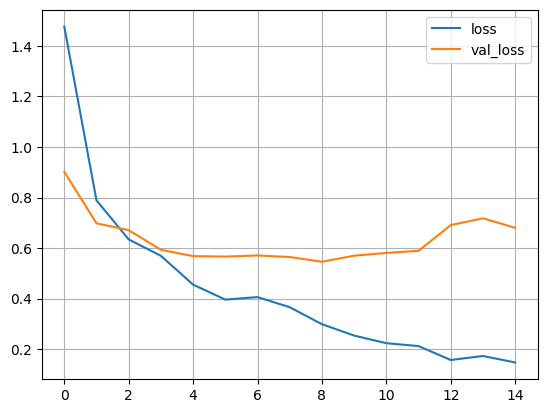

In [16]:
plt.plot(r.history['loss'], label="loss")
plt.plot(r.history['val_loss'],label ="val_loss")
plt.grid()
plt.legend()
plt.show()

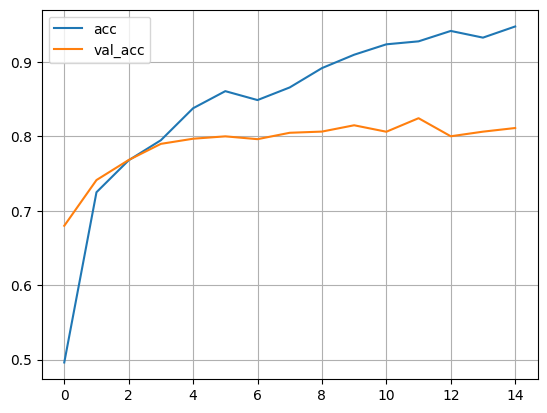

In [17]:
plt.plot(r.history['accuracy'], label="acc")
plt.plot(r.history['val_accuracy'],label ="val_acc")
plt.grid()
plt.legend()
plt.show()

313/313 [==============================] - 5s 15ms/step


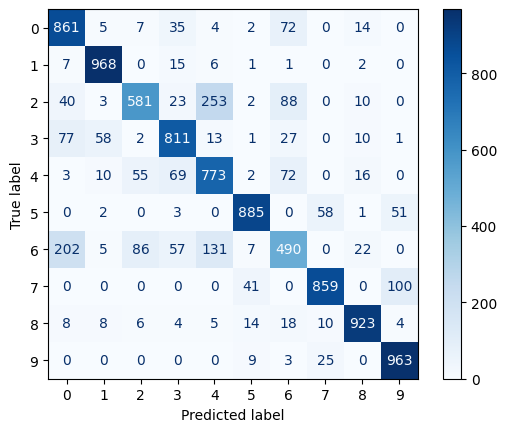

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Macierz konfuzji
cm = confusion_matrix(y_test, y_pred_labels)

# Wyświetlanie macierzy konfuzji
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

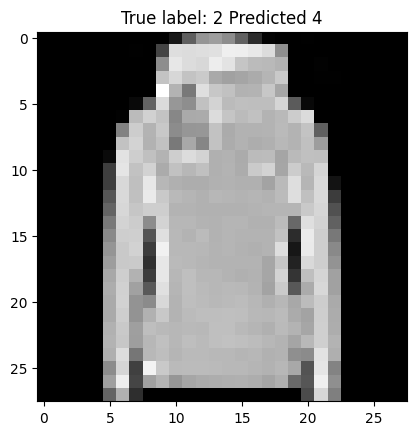

In [15]:
micslassied_idx = np.where(y_pred_labels!=y_test)[0]
i=np.random.choice(micslassied_idx)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted %s" % (y_test[i], y_pred_labels[i]))
plt.show()

# CNN for CIFAR-10

In [42]:
cifar10=tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

y_train = y_train.flatten()
y_test = y_test.flatten()


print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000,)


In [43]:
K=len(set(y_train))
print("Classes: ",K)

Classes:  10


In [44]:
x_train=x_train[:10000] # zmiejszyłem ilość danych żeby się szybciej uczyło
y_train=y_train[:10000]

In [45]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides = 2, activation='relu', padding ="same")(i)
x = Conv2D(64, (3, 3), strides = 2, activation='relu', padding ="same")(x)
x = Conv2D(128, (3, 3), strides = 2, activation='relu', padding ="same")(x)
x = Flatten()(x) # spłaszamy wektor z 3 na 1 wymiarowy tak żeby mógł wejść do sieci neuronowej, nie chcemy używać tej warswy przy warstwach konwolucyjnych ponieważ usunęły by nam istotne informacje - "cechy"
x = Dropout(0.2)(x) # wyrzucamy losowe neurony
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x) # wyrzucamy losowe neurony
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [46]:
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)


Epoch 1/15
313/313 [==============================] - 18s 52ms/step - loss: 1.8469 - accuracy: 0.3280 - val_loss: 1.6517 - val_accuracy: 0.3962
Epoch 2/15
313/313 [==============================] - 16s 50ms/step - loss: 1.5037 - accuracy: 0.4538 - val_loss: 1.4540 - val_accuracy: 0.4693
Epoch 3/15
313/313 [==============================] - 17s 56ms/step - loss: 1.3375 - accuracy: 0.5223 - val_loss: 1.3788 - val_accuracy: 0.4892
Epoch 4/15
313/313 [==============================] - 14s 46ms/step - loss: 1.1850 - accuracy: 0.5729 - val_loss: 1.3069 - val_accuracy: 0.5287
Epoch 5/15
313/313 [==============================] - 15s 48ms/step - loss: 1.0480 - accuracy: 0.6197 - val_loss: 1.3069 - val_accuracy: 0.5338
Epoch 6/15
313/313 [==============================] - 14s 45ms/step - loss: 0.9164 - accuracy: 0.6689 - val_loss: 1.2880 - val_accuracy: 0.5520
Epoch 7/15
313/313 [==============================] - 15s 47ms/step - loss: 0.7858 - accuracy: 0.7172 - val_loss: 1.2966 - val_accuracy:

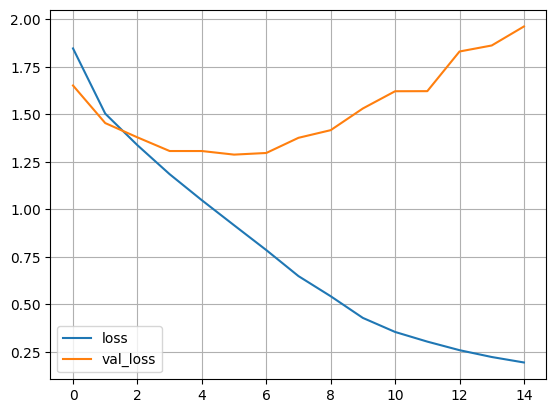

In [47]:
plt.plot(r.history['loss'], label="loss")
plt.plot(r.history['val_loss'],label ="val_loss")
plt.grid()
plt.legend()
plt.show()

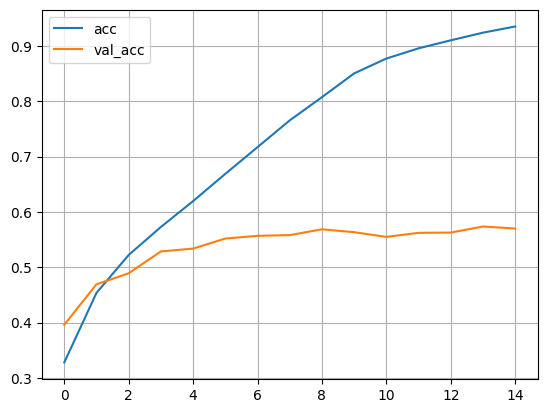

In [48]:
plt.plot(r.history['accuracy'], label="acc")
plt.plot(r.history['val_accuracy'],label ="val_acc")
plt.grid()
plt.legend()
plt.show()

313/313 [==============================] - 3s 9ms/step


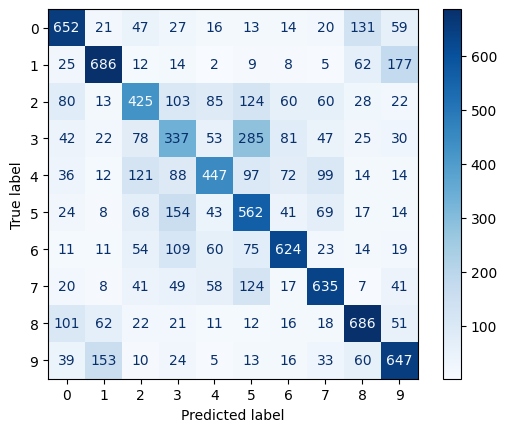

In [49]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Macierz konfuzji
cm = confusion_matrix(y_test, y_pred_labels)

# Wyświetlanie macierzy konfuzji
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

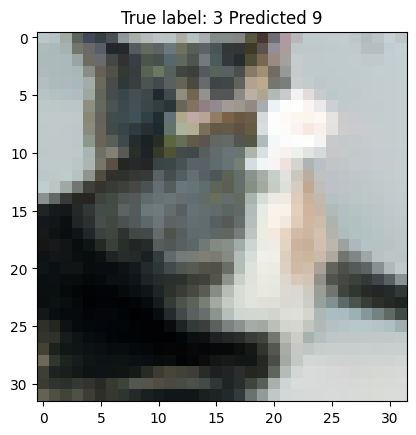

In [50]:
micslassied_idx = np.where(y_pred_labels!=y_test)[0]
i=np.random.choice(micslassied_idx)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted %s" % (y_test[i], y_pred_labels[i]))
plt.show()